In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Final-dataset.csv')
df.dtypes

Date         object
timestamp    object
Person       object
title        object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1538 non-null   object
 1   timestamp  1538 non-null   object
 2   Person     1538 non-null   object
 3   title      1494 non-null   object
dtypes: object(4)
memory usage: 48.2+ KB


In [4]:
df.timestamp = pd.to_datetime(df.timestamp)

In [5]:
df['day'] =df['timestamp'].dt.date
df['day'] =pd.to_datetime(df['day'])
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] =df.timestamp.dt.day_name()
df.head(20)

,Date,timestamp,Person,title,day,hour,dayofweek
0,8/6/22,2022-11-09 18:59:00,A,Piastri has dominated everything he has done e...,2022-11-09,18,Wednesday
1,8/6/22,2022-11-09 18:59:00,A,Wc in all categories,2022-11-09,18,Wednesday
2,8/6/22,2022-11-09 18:59:00,A,Would definitely learn this new car faster,2022-11-09,18,Wednesday
3,8/6/22,2022-11-09 21:03:00,A,W11 was a beast,2022-11-09,21,Wednesday
4,8/6/22,2022-11-09 21:03:00,A,Rocket on rails,2022-11-09,21,Wednesday
5,8/7/22,2022-11-09 19:40:00,A,Will never happen sadly,2022-11-09,19,Wednesday
6,8/8/22,2022-11-09 15:32:00,A,In all this chaos u forget u are still aiming ...,2022-11-09,15,Wednesday
7,8/8/22,2022-11-09 15:33:00,A,They should announce it already.,2022-11-09,15,Wednesday
8,8/9/22,2022-11-09 05:08:00,A,What I meant is. He's already competing at the...,2022-11-09,5,Wednesday
9,8/11/22,2022-11-09 17:39:00,A,How long is this summer break,2022-11-09,17,Wednesday


In [6]:
df2 = df[df['timestamp']>='2022-05-01']
print(df.shape)
print(df2.shape)

(1538, 7)
(1538, 7)


In [7]:
#messages =" ".join(df['title'])
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [8]:
df2.groupby('day',as_index=False)['title'].count().sort_values(by='title',ascending=False).head()

,day,title
0,2022-11-09,1494


In [9]:
messages

'Piastri has dominated everything he has done earlier. From F4 to f2 Wc in all categories Would definitely learn this new car faster W11 was a beast Rocket on rails Will never happen sadly In all this chaos u forget u are still aiming to drive at the pinnacle of the sport. Maybe these guys know that they could get a seat in other formats of racing. Also he\'s loaded already. It\'s not an L , just disappointment ig They should announce it already.  What I meant is. He\'s already competing at the highest level in racing. But fighting for more/wins. Didn\'t say it\'s disappointing. He can always do something else if there is situation where no one signs him. For people like us , feeling bad for daniel not being in formula 1 is stupid.. he is in this position due to his own choices. It\'s disappointing he\'s not at the top anymore winning like before. How long is this summer break Kimi https://nypost.com/2022/08/09/ferrari-recalls-17-years-worth-of-cars-over-possible-brake-failure/amp/ Why

In [10]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [11]:
lowered = clean_words(words)

In [12]:
bow = Counter(lowered)
bow

Counter({'piastri': 5,
         'dominated': 2,
         'everything': 11,
         'done': 3,
         'earlier': 1,
         'wc': 1,
         'category': 1,
         'would': 31,
         'definitely': 2,
         'learn': 1,
         'new': 18,
         'car': 70,
         'faster': 6,
         'beast': 1,
         'rocket': 2,
         'rail': 1,
         'never': 18,
         'happen': 5,
         'sadly': 2,
         'chaos': 2,
         'u': 33,
         'forget': 7,
         'still': 26,
         'aiming': 1,
         'drive': 5,
         'pinnacle': 1,
         'sport': 3,
         'maybe': 12,
         'guy': 13,
         'know': 25,
         'could': 32,
         'get': 41,
         'seat': 7,
         'format': 2,
         'racing': 9,
         'also': 15,
         'loaded': 1,
         'already': 11,
         'l': 3,
         'disappointment': 1,
         'ig': 6,
         'announce': 5,
         'meant': 3,
         'competing': 1,
         'highest': 1,
         'level'

In [13]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [14]:
data = data.head(9)

<AxesSubplot:xlabel='frequency', ylabel='word'>

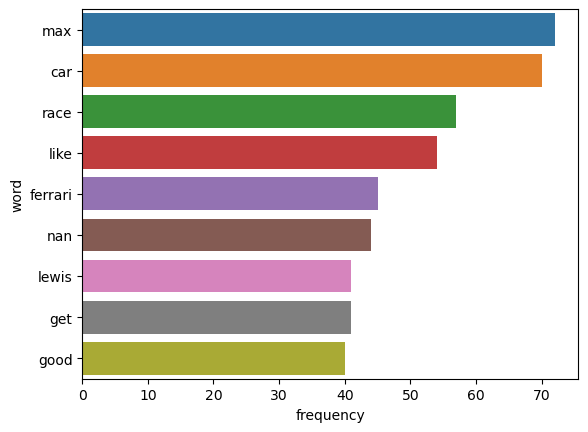

In [15]:
sns.barplot(x='frequency',y='word',data=data)

In [16]:
bow2 =Counter(ngrams(lowered,2))
bow2

Counter({('piastri', 'dominated'): 1,
         ('dominated', 'everything'): 1,
         ('everything', 'done'): 1,
         ('done', 'earlier'): 1,
         ('earlier', 'wc'): 1,
         ('wc', 'category'): 1,
         ('category', 'would'): 1,
         ('would', 'definitely'): 1,
         ('definitely', 'learn'): 1,
         ('learn', 'new'): 1,
         ('new', 'car'): 3,
         ('car', 'faster'): 1,
         ('faster', 'beast'): 1,
         ('beast', 'rocket'): 1,
         ('rocket', 'rail'): 1,
         ('rail', 'never'): 1,
         ('never', 'happen'): 1,
         ('happen', 'sadly'): 1,
         ('sadly', 'chaos'): 1,
         ('chaos', 'u'): 1,
         ('u', 'forget'): 1,
         ('forget', 'u'): 1,
         ('u', 'still'): 1,
         ('still', 'aiming'): 1,
         ('aiming', 'drive'): 1,
         ('drive', 'pinnacle'): 1,
         ('pinnacle', 'sport'): 1,
         ('sport', 'maybe'): 1,
         ('maybe', 'guy'): 1,
         ('guy', 'know'): 1,
         ('know', 'coul

In [17]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [18]:
data2,data3,data4 = word_frequency([str(i) for i in df['title']])

In [19]:
data4

,trigrams,frequency
3237,"(one, like, like)",2
665,"(got, fastest, lap)",2
1741,"(place, grid, penalty)",2
307,"(gained, weight, season)",2
3106,"(crazy, job, man)",2
...,...,...
1815,"(max, last, year)",1
1814,"(ta, max, last)",1
1813,"(got, ta, max)",1
1812,"(perez, got, ta)",1


<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

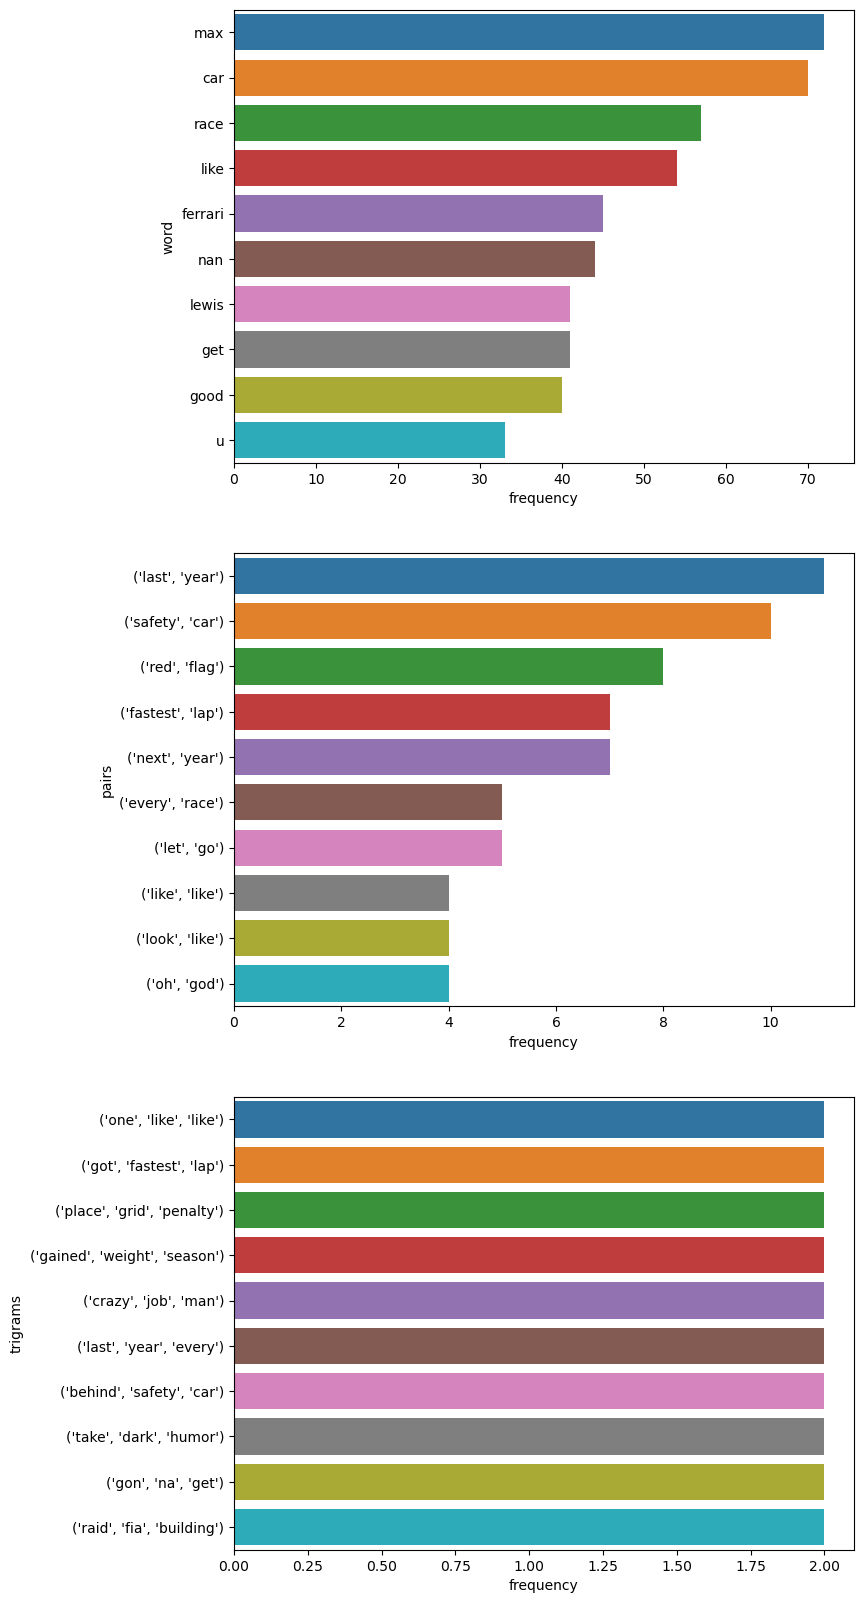

In [20]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(10))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(10))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(10))